In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
churn_df = pd.read_csv("Telco Customer.csv")

In [5]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
# Display basic info about the dataset
print(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check for missing values
print(churn_df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Conversion Process
The conversion of the 'TotalCharges' column from non-numeric to numeric format was conducted as follows:


In [8]:
# Convert 'TotalCharges' to numeric 
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')


In [9]:
churn_df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

# Handling Missing Values
To ensure the quality of the data, we addressed missing values. Specifically, we removed rows with missing values in the 'TotalCharges' column:


In [10]:
# Handle missing values (if needed)
churn_df.dropna(subset=['TotalCharges'], inplace=True)

In [11]:
churn_df.dropna

<bound method DataFrame.dropna of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

# Binary Conversion of 'Churn' Column
For the ease of analysis, the 'Churn' column, which originally contained categorical values ('Yes' and 'No'), was converted into binary values (1 for 'Yes,' indicating churned customers, and 0 for 'No,' indicating retained customers):


In [12]:
# Convert 'Churn' column to binary values
churn_df['Churn'] = churn_df['Churn'].map({'Yes': 1, 'No': 0})


In [13]:
churn_df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

# Calculating Key Metrics
Churn Rate and Retention Rate


In [14]:
# Calculate churn rate
churn_rate = churn_df['Churn'].sum() / len(churn_df)
retention_rate = 1 - churn_rate

print("Overall Churn Rate:", churn_rate)
print("Overall Retention Rate:", retention_rate)

Overall Churn Rate: 0.26578498293515357
Overall Retention Rate: 0.7342150170648465


# Churn Rate by Gender

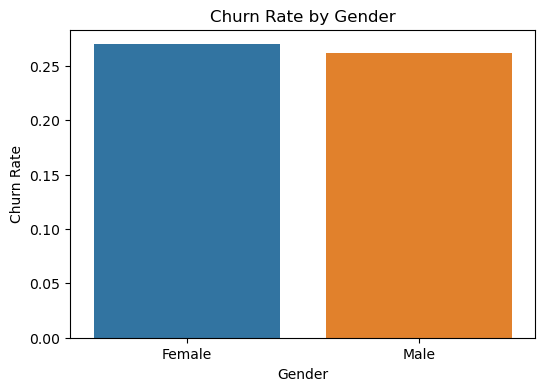

In [15]:
gender_churn = churn_df.groupby('gender')['Churn'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_churn.index, y=gender_churn.values)
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate")
plt.show()


# Churn Rate by Contract Type

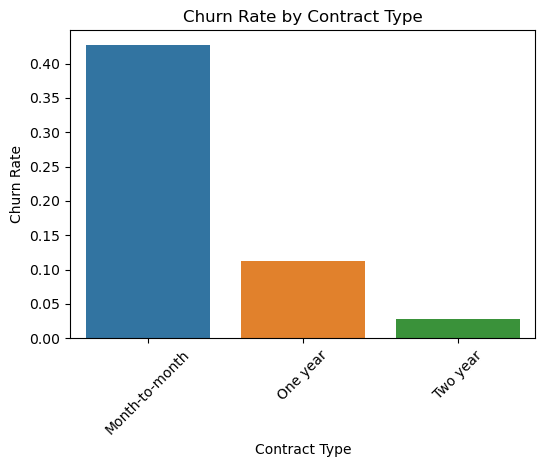

In [16]:
contract_churn = churn_df.groupby('Contract')['Churn'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()

# Churn Rate by Tenure

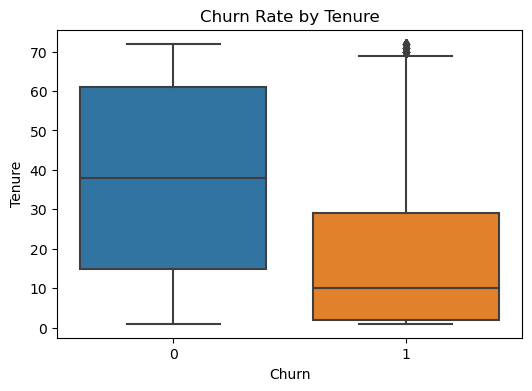

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='tenure', data=churn_df)
plt.title("Churn Rate by Tenure")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()


# Count of Churned and Retained Customers

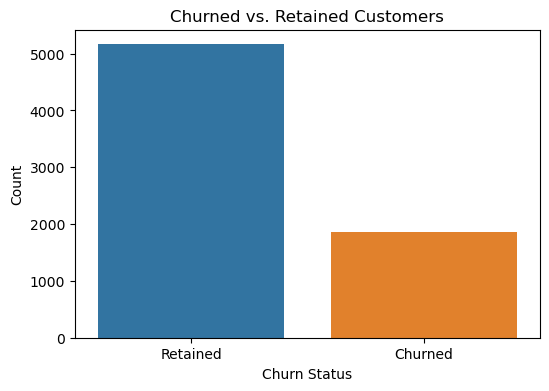

Churned Customers: 1869
Retained Customers: 5163


In [18]:
# Assuming 'Churn' column contains 0 and 1 values
churn_df['Churn'] = churn_df['Churn']  

# Calculate the count of churned and retained customers
churn_counts = churn_df['Churn'].value_counts()

# Plot the distribution of churned and retained customers
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title("Churned vs. Retained Customers")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Retained', 'Churned'])  # Adding labels for clarity
plt.show()

# Print the churn counts
print("Churned Customers:", churn_counts[1])  
print("Retained Customers:", churn_counts[0])  

# Churn Rate for Senior Citizens

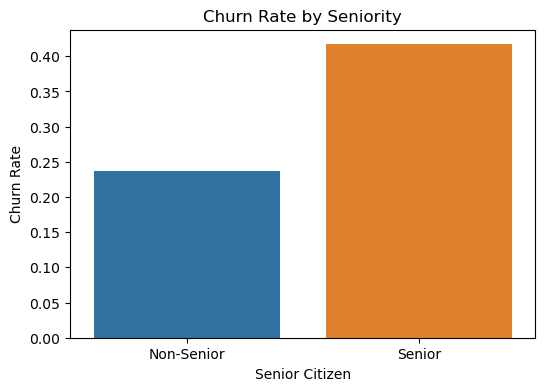

In [19]:
# Calculate churn rate for senior citizens and non-senior citizens
churn_by_seniority = churn_df.groupby('SeniorCitizen')['Churn'].mean()

# Plot churn rates for senior citizens and non-senior citizens
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_by_seniority.index, y=churn_by_seniority.values)
plt.title("Churn Rate by Seniority")
plt.xlabel("Senior Citizen")
plt.ylabel("Churn Rate")
plt.xticks(ticks=[0, 1], labels=['Non-Senior', 'Senior'])  
plt.show()

# Churn Rate for Customers with Multiple Lines vs. Single Lines

In [21]:
import scipy.stats as stats

In [22]:
# Filter data for customers with multiple lines and single lines
multiple_lines_churn = churn_df[churn_df['MultipleLines'] == 'Yes']['Churn']
single_lines_churn = churn_df[churn_df['MultipleLines'] == 'No']['Churn']

# Perform t-test for independent samples to compare churn rates
t_statistic, p_value = stats.ttest_ind(multiple_lines_churn, single_lines_churn)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in churn rates between customers with multiple lines and single lines.")
else:
    print("There is no significant difference in churn rates between customers with multiple lines and single lines.")


T-Statistic: 3.2065917838908637
P-Value: 0.0013498334982998447
There is a significant difference in churn rates between customers with multiple lines and single lines.


# Churn Rate for Customers with and without Online Security

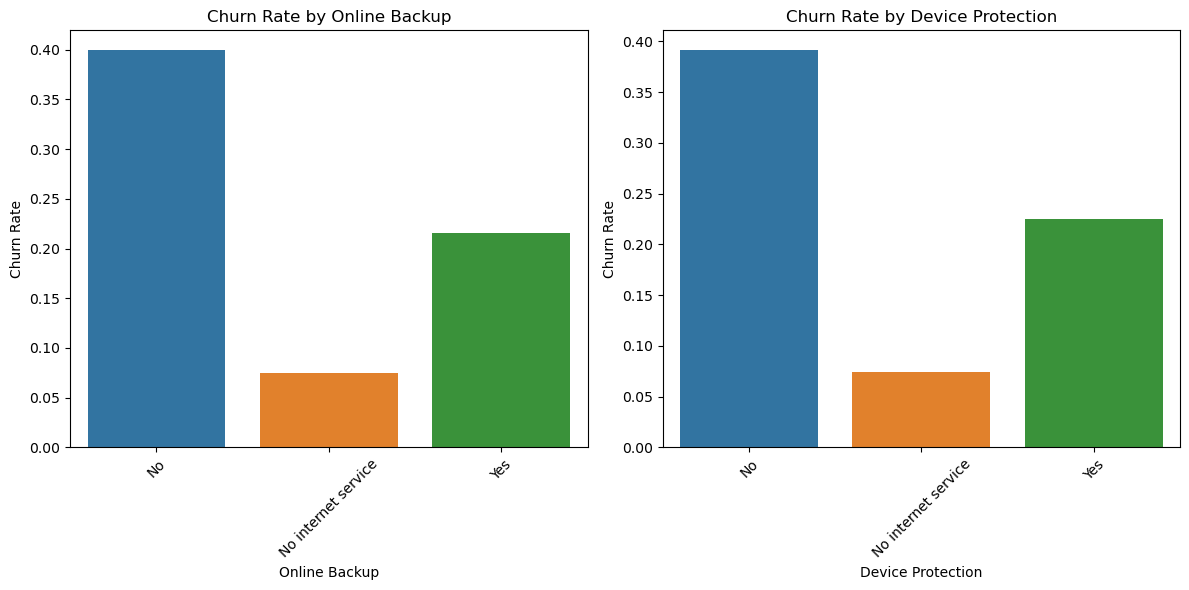

In [23]:

# Calculate churn rates for customers with and without online backup
churn_by_backup = churn_df.groupby('OnlineBackup')['Churn'].mean()

# Calculate churn rates for customers with and without device protection
churn_by_protection = churn_df.groupby('DeviceProtection')['Churn'].mean()

# Plot churn rates for online backup and device protection
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=churn_by_backup.index, y=churn_by_backup.values)
plt.title("Churn Rate by Online Backup")
plt.xlabel("Online Backup")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=churn_by_protection.index, y=churn_by_protection.values)
plt.title("Churn Rate by Device Protection")
plt.xlabel("Device Protection")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Churn Rate for Customers with Online Backup and Device Protection

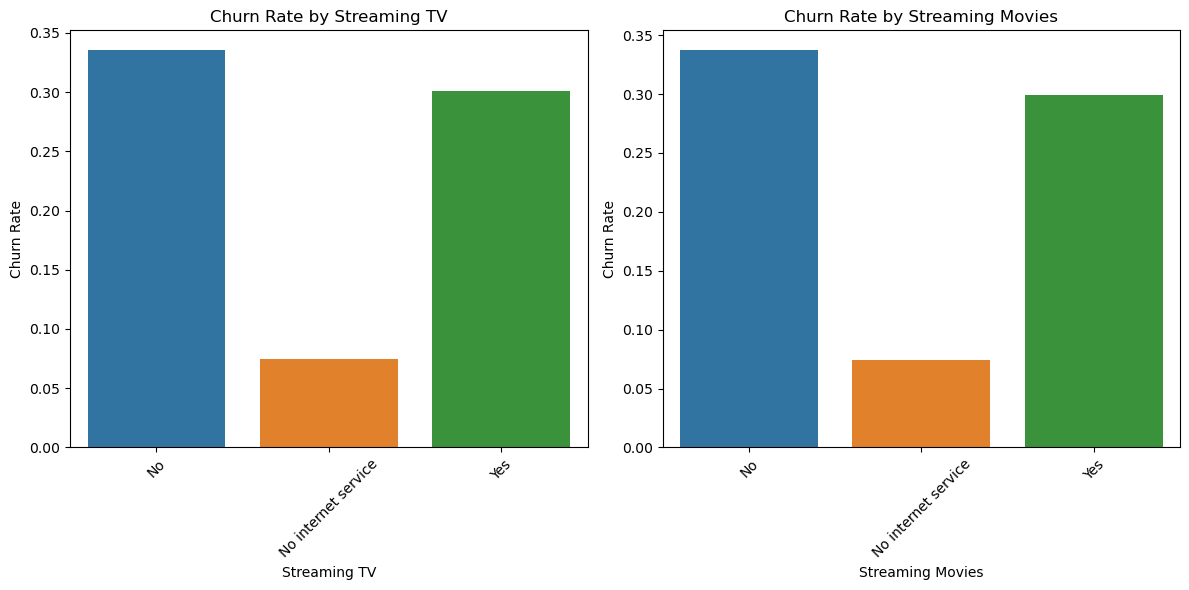

In [24]:
# Calculate churn rates for customers with and without streaming TV and movies
churn_by_streaming_tv = churn_df.groupby('StreamingTV')['Churn'].mean()
churn_by_streaming_movies = churn_df.groupby('StreamingMovies')['Churn'].mean()

# Plot churn rates for streaming TV and streaming movies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=churn_by_streaming_tv.index, y=churn_by_streaming_tv.values)
plt.title("Churn Rate by Streaming TV")
plt.xlabel("Streaming TV")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=churn_by_streaming_movies.index, y=churn_by_streaming_movies.values)
plt.title("Churn Rate by Streaming Movies")
plt.xlabel("Streaming Movies")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Relationship Between Contract Duration and Churn

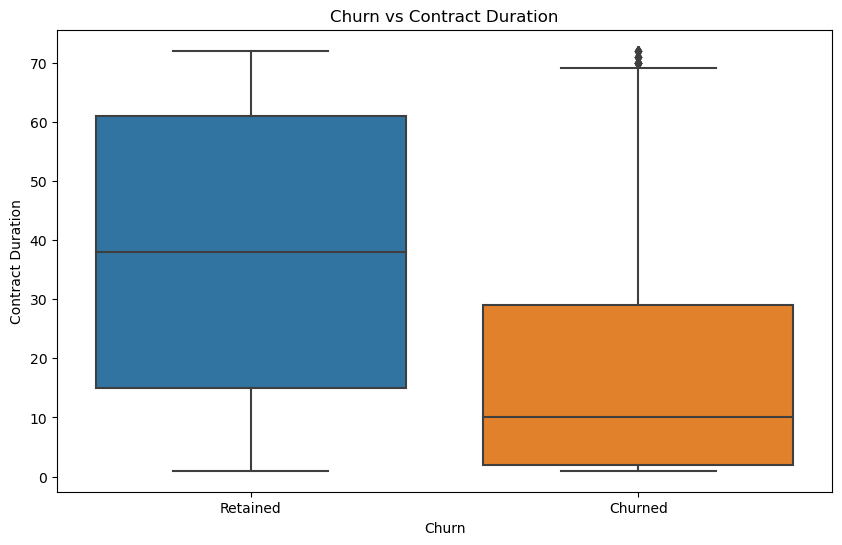

In [25]:
# Create a box plot to visualize the relationship between contract duration and churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=churn_df)
plt.title("Churn vs Contract Duration")
plt.xlabel("Churn")
plt.ylabel("Contract Duration")
plt.xticks(ticks=[0, 1], labels=['Retained', 'Churned'])
plt.show()

# Monthly Charges vs. Total Charges

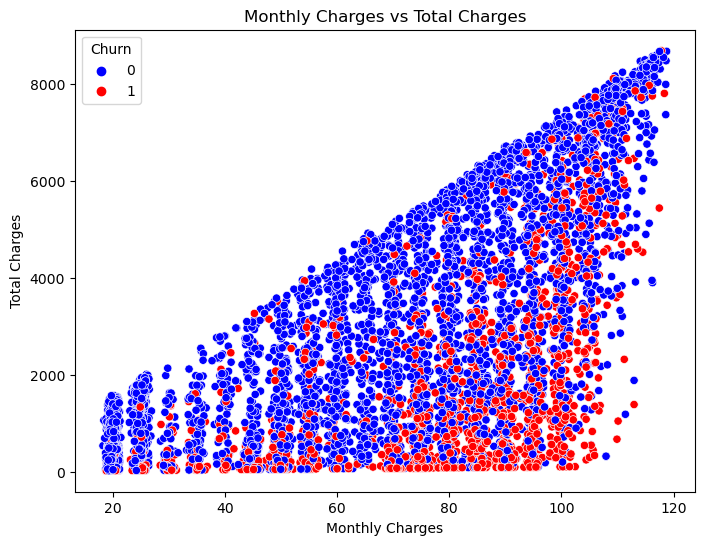

In [29]:

# Create a scatter plot to compare MonthlyCharges and TotalCharges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=churn_df, palette=['blue', 'red'])
plt.title("Monthly Charges vs Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.show()